<a href="https://colab.research.google.com/github/AbdurNawaz/Temporal-Difference-Methods/blob/master/Temporal_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import gym
import numpy as np
import random
import math
from collections import defaultdict, deque
import matplotlib.pyplot as plt

import check_test
from plot_utils import plot_values


In [0]:
env = gym.make('CliffWalking-v0')

In [39]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In [0]:
def update_Q_sarsa(alpha, gamma, Q, state, action, reward, next_state = None, next_action = None):
  current = Q[state][action]
  Qsa_next = Q[next_state][next_action] if next_state is not None else 0
  target = reward + (gamma*Qsa_next)
  new_value = current + (alpha*(target - current))
  return new_value

def epsilon_greedy(Q, state, nA, eps):
  if random.random() > eps:
    return np.argmax(Q[state])
  else:
    return random.choice(np.arange(nA))

In [0]:
def sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
  nA = env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  
  tmp_scores = deque(maxlen=plot_every)
  avg_scores = deque(maxlen=num_episodes)
  
  for i_episode in range(1, num_episodes+1):
    if i_episode % 100 == 0:
      print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
      sys.stdout.flush()
    score = 0
    state = env.reset()
    
    eps = 1.0 / i_episode
    action = epsilon_greedy(Q, state, nA, eps)
    
    while True:
      next_state, reward, done, info = env.step(action)
      score += reward
      
      if not done:
        next_action = epsilon_greedy(Q, next_state, nA, eps)
        Q[state][action] = update_Q_sarsa(alpha, gamma, Q, \
                                          state, action, reward, next_state, next_action)
        state = next_state
        action = next_action
      if done:
        Q[state][action] = update_Q_sarsa(alpha, gamma, Q, \
                                          state, action, reward)
        tmp_scores.append(score)
        break
        
    if (i_episode % plot_every == 0):
      avg_scores.append(np.mean(tmp_scores))
      
  plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
  plt.xlabel('Episode Number')
  plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
  plt.show()
  print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    


  return Q

Episode 5000/5000

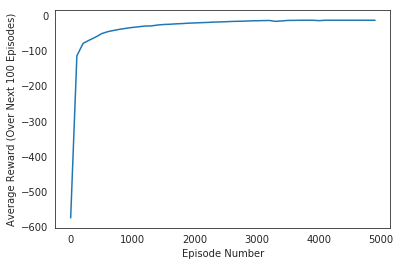

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 2  1  2  1  1  2  1  1  2  1  2  2]
 [ 0  1  1  2  0  2  1  1  1  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


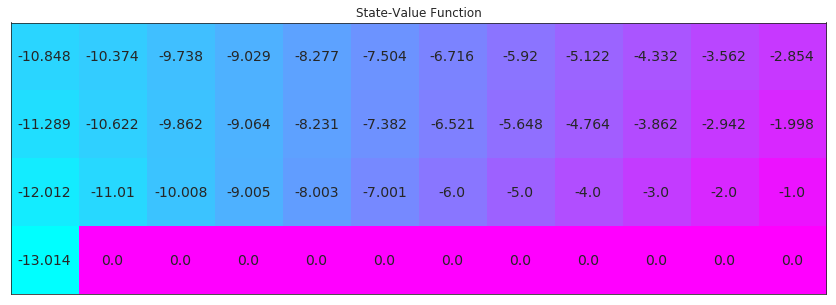

In [45]:
Q_sarsa = sarsa(env, 5000, 0.01)

policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)